# (ford go bike Exploration)
## by (yahia ousama)

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading in the dataset and describing its properties through the questions below.

# Gathering

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Assessing

In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.duplicated().value_counts()

False    183412
dtype: int64

# Cleaning

In [7]:
#droping unnecessary columns
df.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude'
        ,'end_station_longitude','bike_id','start_station_name','end_station_name','bike_share_for_all_trip'],axis=1,inplace=True)

In [8]:
#dropping the null values
df.dropna(inplace=True)

In [9]:
#dropping the duplicated values 
df.drop_duplicates(inplace=True)

In [10]:
#changing the wrong data types to the right data type
df['member_birth_year']=df['member_birth_year'].astype(int)
df[['start_time','end_time']]=df[['start_time','end_time']].apply(pd.to_datetime)

In [11]:
#adding important columns
df['activeness_of_weekdays'] = df['start_time'].dt.day_name()
df['activeness_of_hours'] = df['start_time'].dt.hour
#the start and the end have the same distribution so the start time represents both of them
#same thing for the days of week

In [12]:
#drop unnecessary columns
df.drop(['start_time','end_time'],axis=1,inplace=True)

## Univariate Exploration


In [13]:
df.describe()

,duration_sec,member_birth_year,activeness_of_hours
count,175147.000000,175147.000000,175147.000000
mean,704.211845,1984.806437,13.456297
std,1641.608363,10.116689,4.733351
min,61.000000,1878.000000,0.000000
25%,323.000000,1980.000000,9.000000
50%,510.000000,1987.000000,14.000000
75%,789.000000,1992.000000,17.000000
max,84548.000000,2001.000000,23.000000


(1940.0, 2003.0)

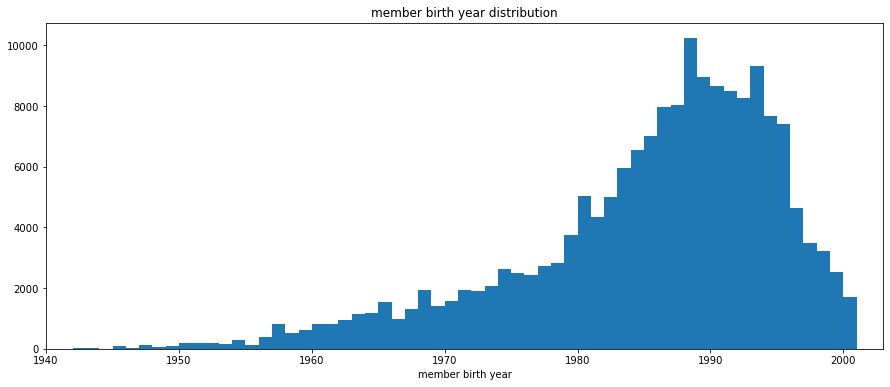

In [14]:
plt.figure(figsize=[15,6])
step=1
bins=np.arange(1878,2001+1,1)
plt.hist(data=df,x='member_birth_year',bins=bins);
plt.xlim(1920);
plt.xlabel('member birth year');
plt.title('member birth year distribution');
plt.xlim(1940,2003)

##### most of the member's birth year is from 2000 to 1980

# 

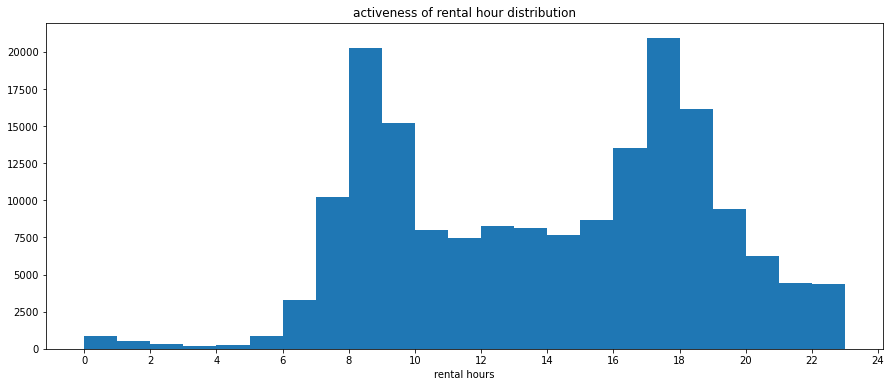

In [15]:
plt.figure(figsize=[15,6])
bins=np.arange(0,24,1)
plt.hist(data=df,x='activeness_of_hours',bins=bins);
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24],[0,2,4,6,8,10,12,14,16,18,20,22,24]);
plt.xlabel('rental hours');
plt.title('activeness of rental hour distribution');

##### most common rental hours is from 8  to 10 and from 16 to 19 

# 

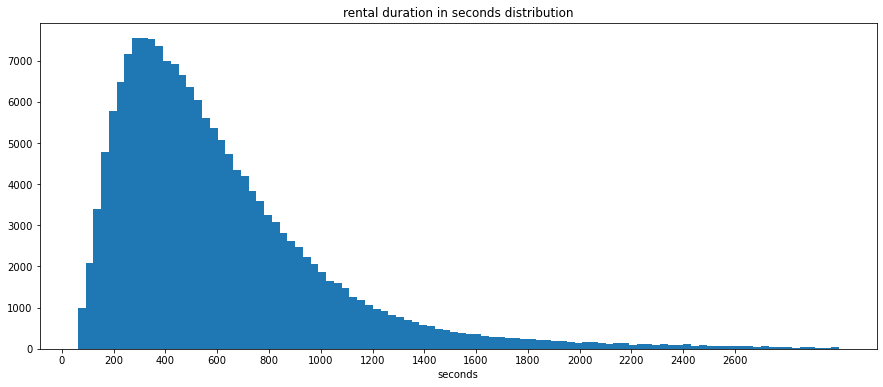

In [16]:
plt.figure(figsize=[15,6])
bins=np.arange(61,3000+30,30)
plt.hist(data=df,x='duration_sec',bins=bins);
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600],
           [0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600]);
plt.title('rental duration in seconds distribution');
plt.xlabel('seconds');

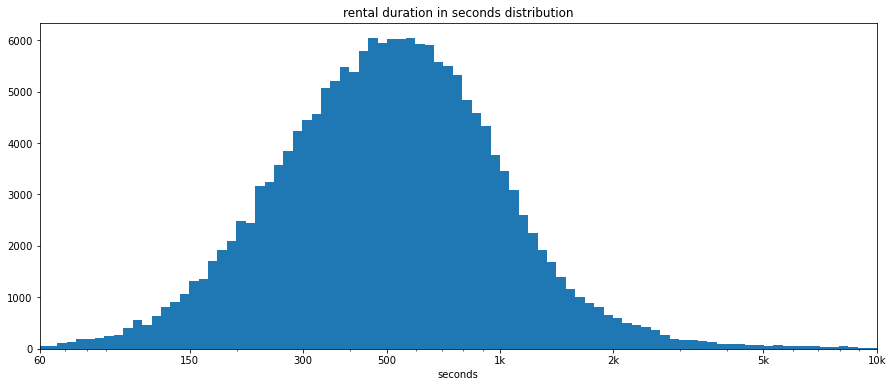

In [17]:
#the previous figure has a long tail so i'll scale it
plt.figure(figsize=[15,6])
step=0.025
bins=10**np.arange(0,np.log10(df['duration_sec'].max())+.025,.025)
plt.hist(data=df,x='duration_sec',bins=bins);
plt.xscale('log')
plt.xticks([60,150,300,500, 1e3, 2e3, 5e3, 1e4, 2e4], [60,150,300,500, '1k', '2k', '5k', '10k', '20k']);
plt.xlim(60,10000);
plt.title('rental duration in seconds distribution');
plt.xlabel('seconds');

##### the most common rental duration is from 300 to 1000 second and the mean is 500

# 

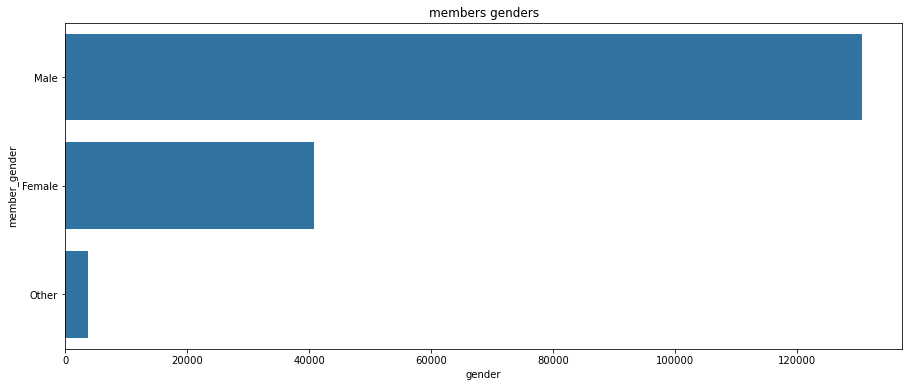

In [18]:
plt.figure(figsize=[15,6]);
blue=sb.color_palette()[0]
sb.countplot(data=df,y='member_gender',order=['Male','Female','Other'],color=blue);
plt.xlabel('gender');
plt.title('members genders');

##### male are more interested in this bike rental serves than females

# 

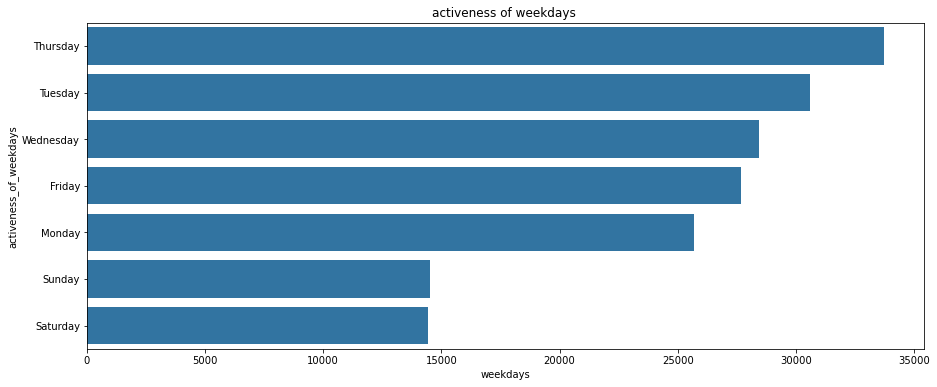

In [19]:
plt.figure(figsize=[15,6]);
blue=sb.color_palette()[0]
order=df['activeness_of_weekdays'].value_counts().index
sb.countplot(data=df,y='activeness_of_weekdays',order=order,color=blue);
plt.xlabel('weekdays');
plt.title('activeness of weekdays ');

##### thursday is the most active day, then tuesday ,then wednesday

# 

## Bivariate Exploration


In [20]:
df['duration_minutes']=(df['duration_sec']/60)
df

,duration_sec,user_type,member_birth_year,member_gender,activeness_of_weekdays,activeness_of_hours,duration_minutes
0,52185,Customer,1984,Male,Thursday,17,869.750000
2,61854,Customer,1972,Male,Thursday,12,1030.900000
3,36490,Subscriber,1989,Other,Thursday,17,608.166667
4,1585,Subscriber,1974,Male,Thursday,23,26.416667
5,1793,Subscriber,1959,Male,Thursday,23,29.883333
...,...,...,...,...,...,...,...
183407,480,Subscriber,1996,Male,Friday,0,8.000000
183408,313,Subscriber,1984,Male,Friday,0,5.216667
183409,141,Subscriber,1990,Male,Friday,0,2.350000
183410,139,Subscriber,1988,Male,Friday,0,2.316667


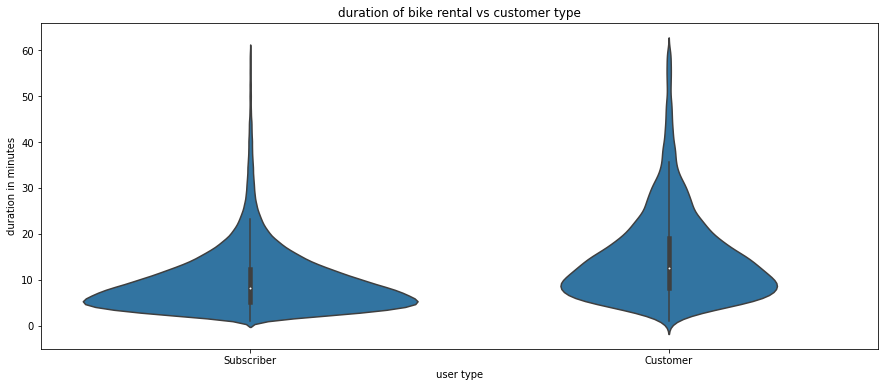

In [21]:
plt.figure(figsize=[15,6]);
sb.violinplot(data=df.query("duration_minutes<=60"),x='user_type',y='duration_minutes',color=blue);
plt.title('duration of bike rental vs customer type');
plt.xlabel('user type');
plt.ylabel('duration in minutes');

##### subscribers are consuming the service from 1 to 10 minutes more than the customers

# 

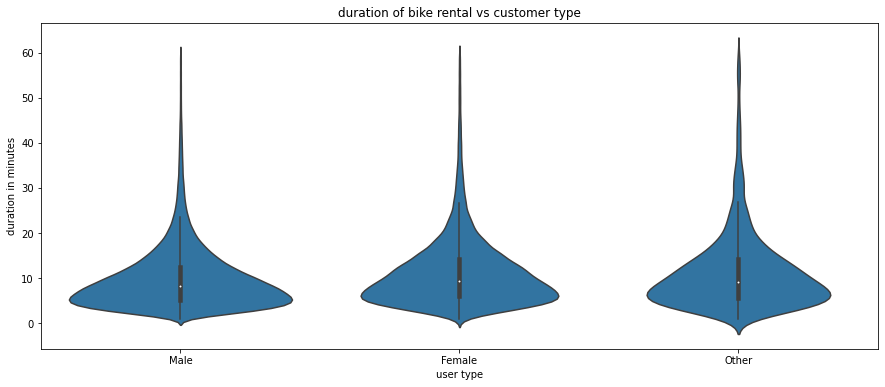

In [22]:
plt.figure(figsize=[15,6]);
sb.violinplot(data=df.query("duration_minutes<=60"),x='member_gender',y='duration_minutes',color=blue);
plt.title('duration of bike rental vs customer type');
plt.xlabel('user type');
plt.ylabel('duration in minutes');

##### all genders are the same in consuming the service

# 

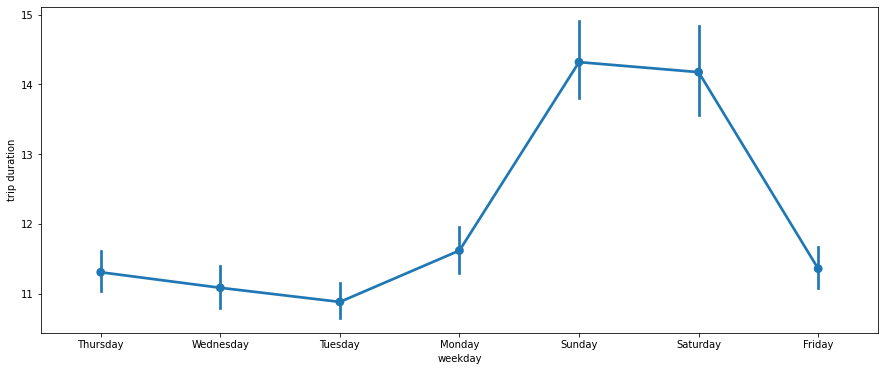

In [23]:
plt.figure(figsize=[15,6]);
sb.pointplot(data=df,x='activeness_of_weekdays',y='duration_minutes');
plt.xlabel('weekday');
plt.ylabel('trip duration');

##### it's obvious that sunday and saturday have the most duration trips

# 

# Bivariate Exploration

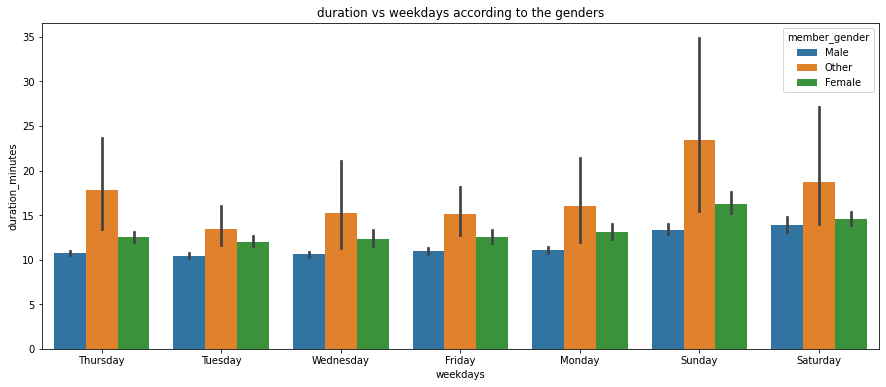

In [24]:
plt.figure(figsize=[15,6]);
blue=sb.color_palette()[0]
order=df['activeness_of_weekdays'].value_counts().index
sb.barplot(data=df,y='duration_minutes',x='activeness_of_weekdays',order=order,hue='member_gender');
plt.xlabel('weekdays');
plt.title('duration vs weekdays according to the genders');

##### there is difference in the consumption duration between genders on different days

# 

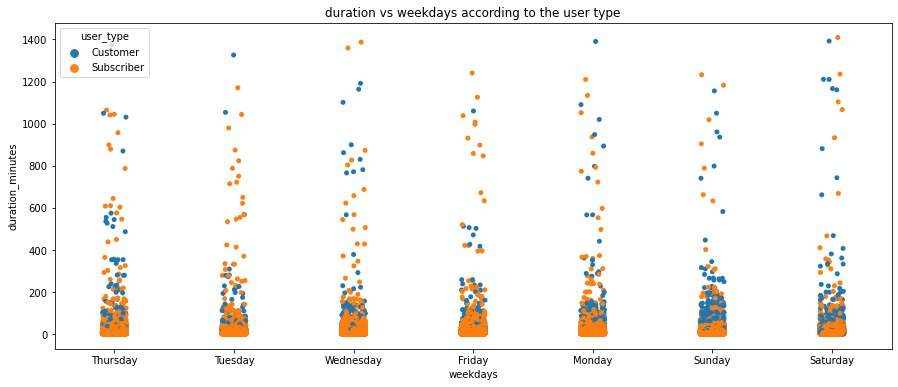

In [25]:
plt.figure(figsize=[15,6]);
blue=sb.color_palette()[0]
order=df['activeness_of_weekdays'].value_counts().index
sb.stripplot(data=df,y='duration_minutes',x='activeness_of_weekdays',order=order,hue='user_type');
plt.xlabel('weekdays');
plt.title('duration vs weekdays according to the user type');

###### when divided to weekdays when divided to weekdays subscribers have longer trips than the customers  subscribers have longer trips thans the castomers 